# IMPORT STATEMENTS

In [4]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
from numpy import random
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pylab
from pylab import legend
from pylab import plot, show, title,xlabel,ylabel
import scipy
from scipy import stats
from scipy.stats import binom , poisson
import numpy as np
import pandas as pd
from scipy.stats import expon
from scipy.stats import norm , t
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
from statsmodels import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
from statsmodels import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from scipy.stats import chi2
from scipy.stats import f
from statsmodels.stats import proportion as ssp
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chisquare
from statsmodels.stats import rates
from statsmodels.stats.rates import test_poisson
from scipy.stats import chi2
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import sklearn
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind


# 1 . 1 st DATA SET LOADING

In [144]:
#DATA SET LOADED
df=pd.read_csv('/content/drive/MyDrive/credit_risk_previous_loans.csv')

In [6]:
# PRINT FIRST FIVE LINES OF DATA
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# ROWS AND COLUMNS PRINTED
df.shape

(1670214, 37)

In [8]:
# INFORMATION OF THE DATSET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

# **2.DATA CLEANING**

In [9]:
# COUNTING THE NULL VALUES AND ADD THEM AND TAKE INFO
df.isna().sum()

,0
SK_ID_PREV,0
SK_ID_CURR,0
NAME_CONTRACT_TYPE,0
AMT_ANNUITY,372235
AMT_APPLICATION,0
AMT_CREDIT,1
AMT_DOWN_PAYMENT,895844
AMT_GOODS_PRICE,385515
WEEKDAY_APPR_PROCESS_START,0
HOUR_APPR_PROCESS_START,0


In [10]:
#CALCULATING THE MISSING VALUES  PERCENTAGE  SO WE CAN DELTE COUMNS
# WHICH ARE NOT USEFUL
# ABOVE 40 PERCENT NULL COLUMNS CANT GIVE ANY INSIGHTS TO BUSINESS

In [11]:
missing_percent = df.isnull().mean() * 100

In [12]:
#CHEKCING THE PERCENTAGE
missing_percent

,0
SK_ID_PREV,0.000000
SK_ID_CURR,0.000000
NAME_CONTRACT_TYPE,0.000000
AMT_ANNUITY,22.286665
AMT_APPLICATION,0.000000
AMT_CREDIT,0.000060
AMT_DOWN_PAYMENT,53.636480
AMT_GOODS_PRICE,23.081773
WEEKDAY_APPR_PROCESS_START,0.000000
HOUR_APPR_PROCESS_START,0.000000


In [13]:
#DROP COLUMN WHERE MISSING PERCENTGAE IS GREATER THAN 40.
colums_drop=missing_percent[missing_percent>40].index.tolist()
colums_drop

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [14]:
# DROP THE COLUM USES IGNORE FOR OCCURING ERRORS
df=df.drop(columns=colums_drop,errors='ignore')

In [15]:
# NOW IN DF  ROWS=1670214 and Columns = 26
df.shape

(1670214, 26)

In [16]:
#NUMERICAL COLUMNS ARE REPLACING USING MEDIAN
num_cols=df.select_dtypes(include='number').columns

#NOW FINDING MEDIAN OF THIS COLUMNS FOR REPLACING NULL VALUE
median_values= df[num_cols].median()

#FILLNA USE FOR REPLACING THE MEDIAN VALUE
df[num_cols]=df[num_cols].fillna(median_values)

In [17]:
# NUMERICAL COLUMN ARE REPLACING USING THE mode
cat_cols=df.select_dtypes(include='object').columns

#NOW FINDIAN mode OF THIS COLUMNS  FOR REPLACING NULL VALUE
mode= df[cat_cols].mode().iloc[0]

#FILLNA USE FOR REPLACING THE mode VALUE
df[cat_cols]=df[cat_cols].fillna(mode)

In [18]:
# CHECKING THAT IS THE DATA NOW CLEAN OR NOT FOR WORKING
# THE PERCENTAGE OF DATA MISSING IS 0 now SO NOW WE CAN WORK
missing_percentage=(df.isna().sum()/len(df))*100
missing_percentage.sort_values(ascending=False)

,0
SK_ID_PREV,0.0
SK_ID_CURR,0.0
NAME_CONTRACT_TYPE,0.0
AMT_ANNUITY,0.0
AMT_APPLICATION,0.0
AMT_CREDIT,0.0
AMT_GOODS_PRICE,0.0
WEEKDAY_APPR_PROCESS_START,0.0
HOUR_APPR_PROCESS_START,0.0
FLAG_LAST_APPL_PER_CONTRACT,0.0


In [19]:
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [20]:
#2.2 Fix Incorrect or Placeholder Values

In [21]:
# Convert to absolute value (positive number of days)
df['DAYS_DECISION_ABS'] = df['DAYS_DECISION'].abs()

In [22]:
# Also create a 'years' version for easier interpretation
df['YEARS_DECISION'] = df['DAYS_DECISION_ABS']/365.25

In [23]:
#REMOVING OUTLIERS

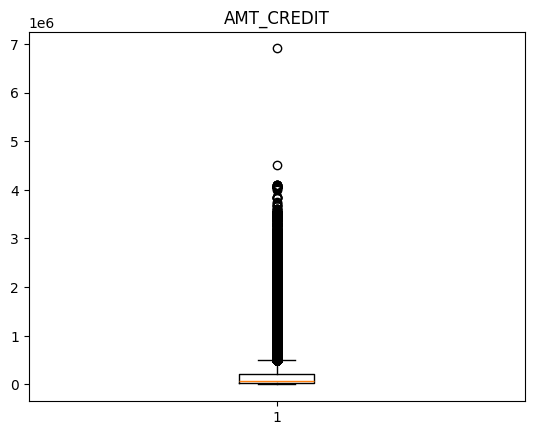

In [24]:
#CHECKING FOR AMT_CREDIT COLUMN

plt.boxplot(df.AMT_CREDIT)
plt.title('AMT_CREDIT')
plt.show()

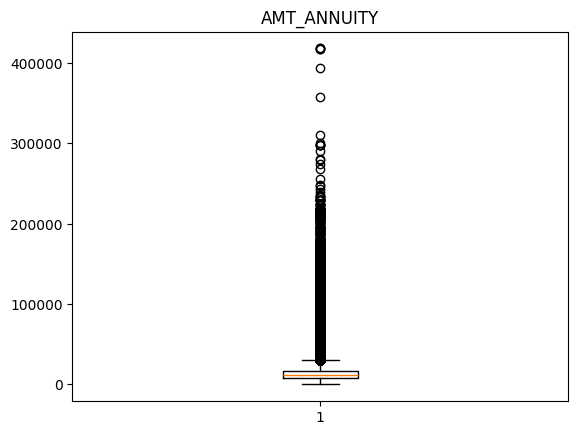

In [25]:
#CHECKING FOR AMT_ANNUITY COLUMN

plt.boxplot(df.AMT_ANNUITY)
plt.title('AMT_ANNUITY')
plt.show()

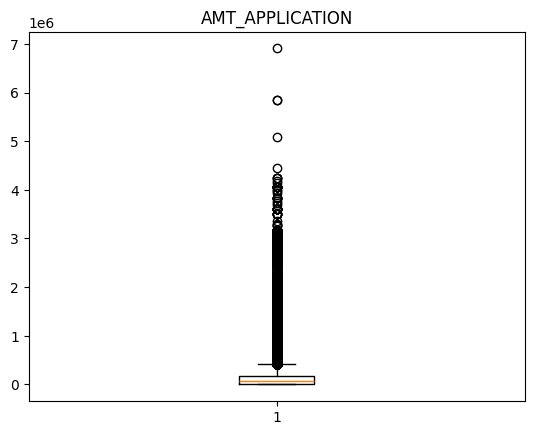

In [26]:
#CHECKING FOR INCOME COLUMN

plt.boxplot(df.AMT_APPLICATION)
plt.title('AMT_APPLICATION')
plt.show()

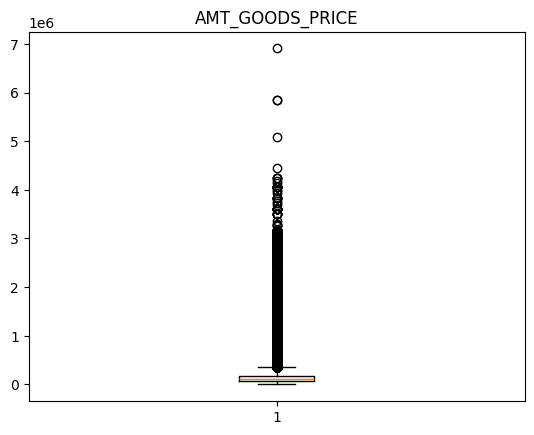

In [27]:
#CHECKING FOR AMT_GOODS_PRICE COLUMN

plt.boxplot(df.AMT_GOODS_PRICE)
plt.title('AMT_GOODS_PRICE')
plt.show()

In [185]:
#SAVING IN ONE COLUM FOR DELETING THE OUTLIERS
cols_outliers = ['AMT_CREDIT','AMT_ANNUITY','AMT_APPLICATION','AMT_GOODS_PRICE']

In [186]:
# USES FOR LOOP FOR DELTING OUTLIERS
for col in cols_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

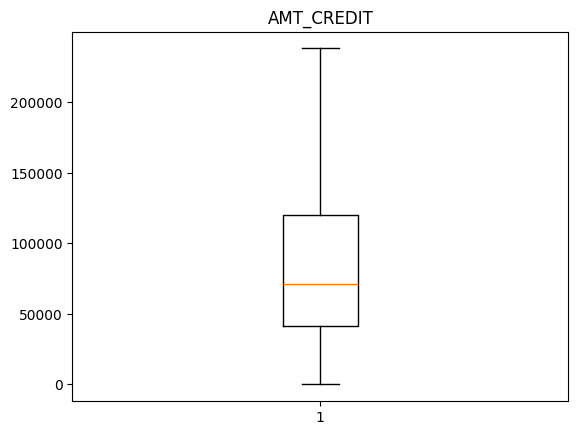

In [178]:
#CHECKING FOR AMT_CREDIT COLUMN

plt.boxplot(df.AMT_CREDIT)
plt.title('AMT_CREDIT')
plt.show()

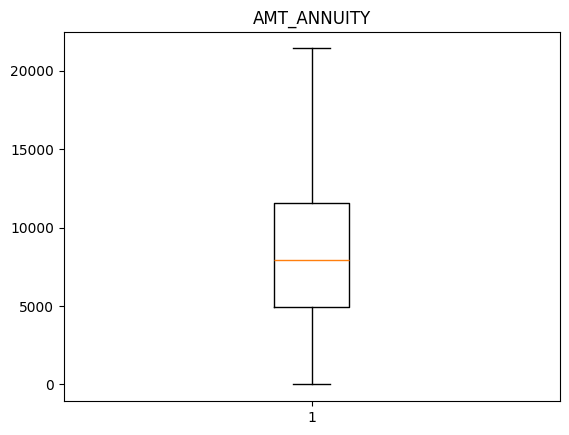

In [187]:
#CHECKING FOR AMT_ANNUITY COLUMN

plt.boxplot(df.AMT_ANNUITY)
plt.title('AMT_ANNUITY')
plt.show()

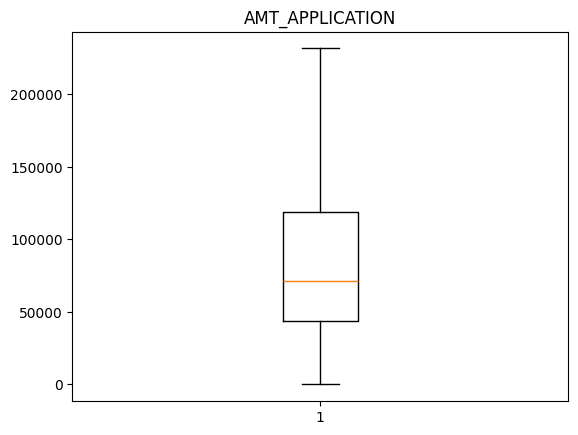

In [158]:
#CHECKING FOR INCOME COLUMN

plt.boxplot(df.AMT_APPLICATION)
plt.title('AMT_APPLICATION')
plt.show()

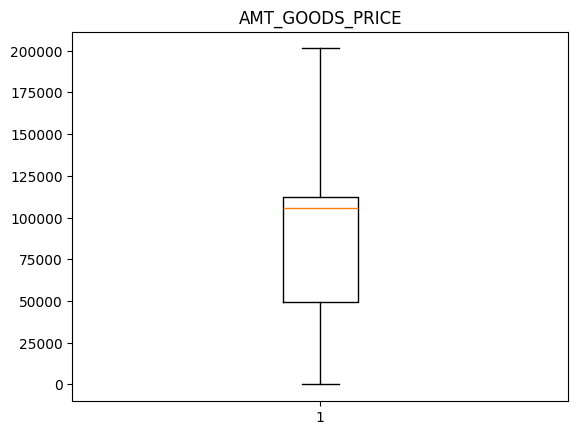

In [33]:
#CHECKING FOR AMT_GOODS_PRICE COLUMN

plt.boxplot(df.AMT_GOODS_PRICE)
plt.title('AMT_GOODS_PRICE')
plt.show()

# **3 FEATURE ENGINEERING**

In [34]:
# DATA IS CLEAN SO NOW WE CAN START FEATURE ENGINERRING TO START ANALYZING THE DATA .

In [35]:
#Credit to annuity ratio
# how large credit is vs annuity
df["CREDIT_ANNUITY_RATIO"] = df["AMT_CREDIT"] / df["AMT_ANNUITY"]
df["CREDIT_ANNUITY_RATIO"]

,CREDIT_ANNUITY_RATIO
0,9.907942
2,9.059618
6,0.000000
7,0.000000
8,0.000000
...,...
1670206,12.573091
1670207,8.922995
1670210,9.708744
1670211,8.898949


In [36]:
#Application to credit ratio
# application amount relative to credit
df["APPLICATION_CREDIT_RATIO"] = df["AMT_APPLICATION"] / df["AMT_CREDIT"]

In [37]:
df["APPLICATION_CREDIT_RATIO"]

,APPLICATION_CREDIT_RATIO
0,1.000000
2,0.824511
6,NaN
7,NaN
8,NaN
...,...
1670206,0.737898
1670207,1.000000
1670210,1.364877
1670211,1.026467


In [38]:
#Flag variables such as:
#IS_REFUSED = 1 if ANY previous rejection
#IS_APPROVED = 1 if ANY previous approval
#Missing customers get 0
df["IS_REFUSED"] = (df["NAME_CONTRACT_STATUS"] == "Refused").astype(int)
df["IS_APPROVED"] = (df["NAME_CONTRACT_STATUS"] == "Approved").astype(int)


In [39]:
df["IS_REFUSED"].head()

,IS_REFUSED
0,0
2,0
6,0
7,0
8,0


In [40]:
df["IS_APPROVED"].head()

,IS_APPROVED
0,1
2,1
6,0
7,0
8,0


# **4.EDA**

In [41]:
#UNIVARIATE ANALYSIS

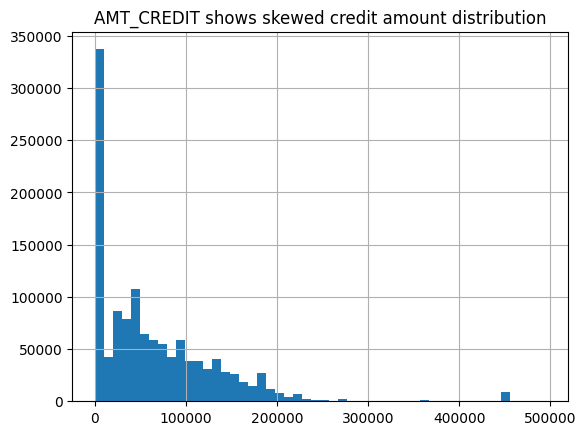

In [42]:
#AMT_CREDIT — Histogram (shows distribution + skewness)
df["AMT_CREDIT"].hist(bins=50)
plt.title("AMT_CREDIT shows skewed credit amount distribution")
plt.show()


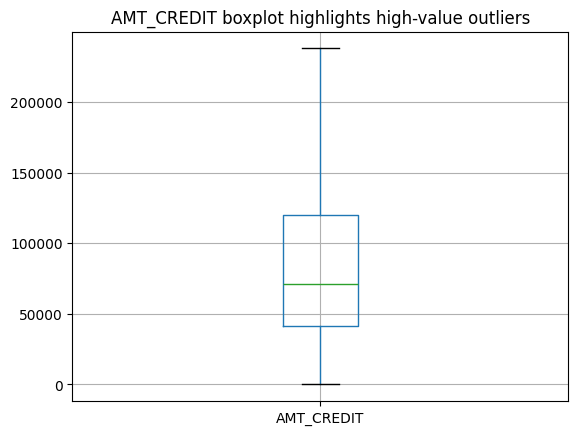

In [188]:
#AMT_CREDIT — Boxplot (detects extreme credit outliers)
df.boxplot(column="AMT_CREDIT")
plt.title("AMT_CREDIT boxplot highlights high-value outliers")
plt.show()


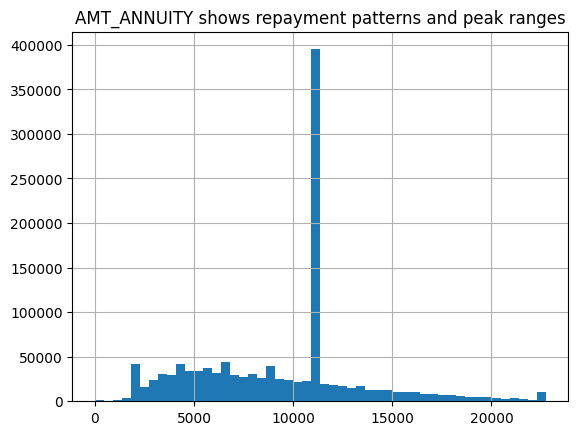

In [44]:
#AMT_ANNUITY — Histogram (shows common repayment ranges)
df["AMT_ANNUITY"].hist(bins=50)
plt.title("AMT_ANNUITY shows repayment patterns and peak ranges")
plt.show()


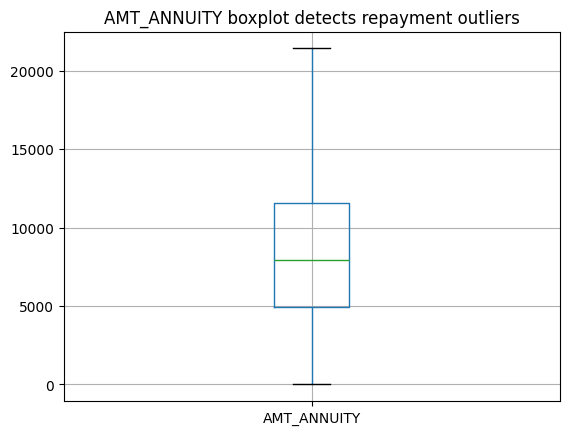

In [189]:
# AMT_ANNUITY — Boxplot (finds unusually high annuities)
df.boxplot(column="AMT_ANNUITY")
plt.title("AMT_ANNUITY boxplot detects repayment outliers")
plt.show()


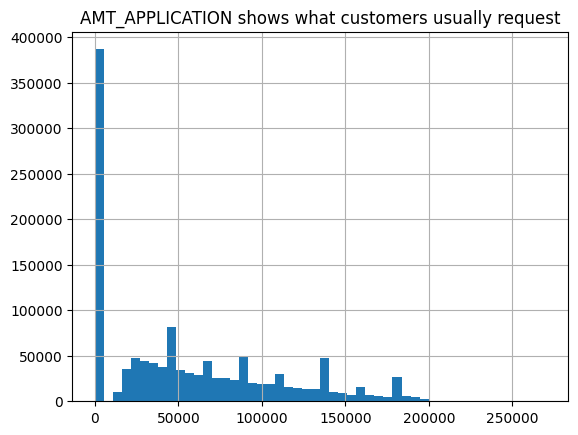

In [46]:
#AMT_APPLICATION — Histogram (shows loan demand patterns)
df["AMT_APPLICATION"].hist(bins=50)
plt.title("AMT_APPLICATION shows what customers usually request")
plt.show()


In [47]:
#CATEGORICAL ANALYSIS — With One-Line Insights + Code

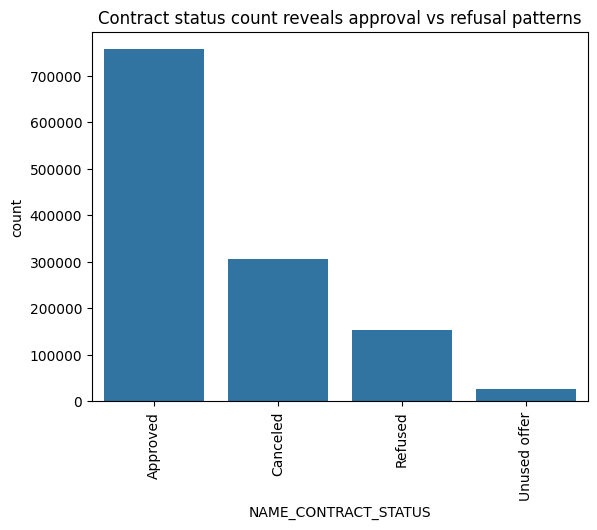

In [48]:
#NAME_CONTRACT_STATUS — Countplot (shows approval/refusal trends)
sns.countplot(x=df["NAME_CONTRACT_STATUS"])
plt.title("Contract status count reveals approval vs refusal patterns")
plt.xticks(rotation=90)
plt.show()

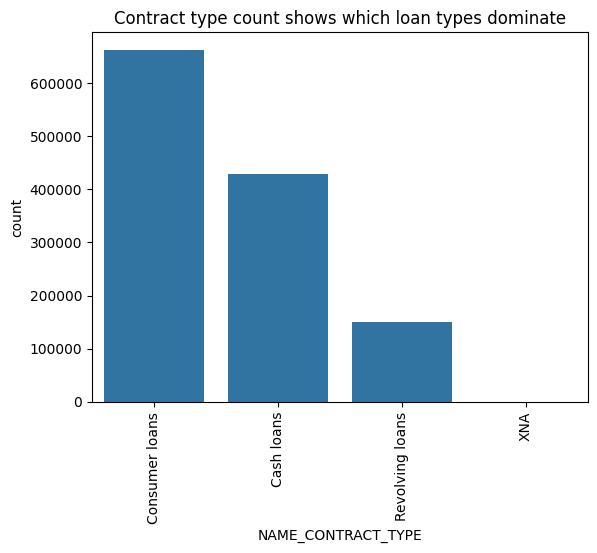

In [49]:
# NAME_CONTRACT_TYPE — Countplot (shows popular loan product types)
sns.countplot(x=df["NAME_CONTRACT_TYPE"])
plt.title("Contract type count shows which loan types dominate")
plt.xticks(rotation=90)
plt.show()


In [50]:
#4.2 Bivariate Analysis

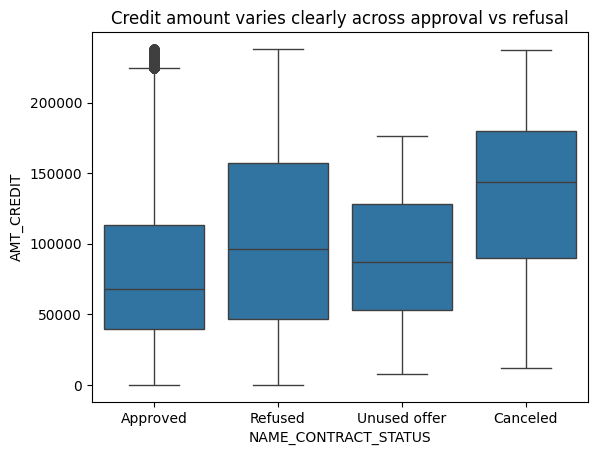

In [192]:
#Credit Amount vs Status —
#boxplot (shows how credit differs for approved vs refused)
sns.boxplot(x=df["NAME_CONTRACT_STATUS"], y=df["AMT_CREDIT"])
plt.title("Credit amount varies clearly across approval vs refusal")
plt.show()


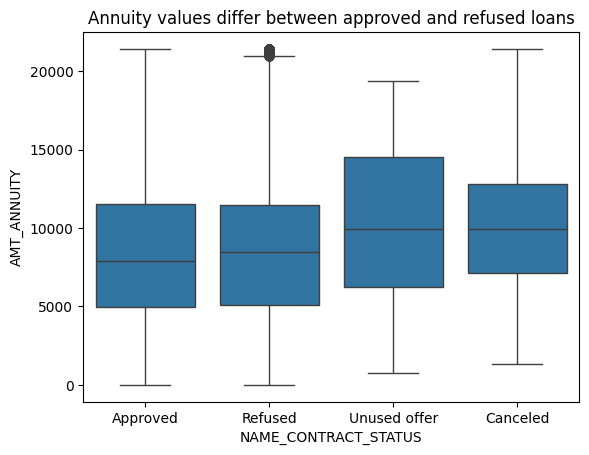

In [194]:
# Annuity vs Status — boxplot (shows repayment burden differences)
sns.boxplot(x=df["NAME_CONTRACT_STATUS"], y=df["AMT_ANNUITY"])
plt.title("Annuity values differ between approved and refused loans")
plt.show()


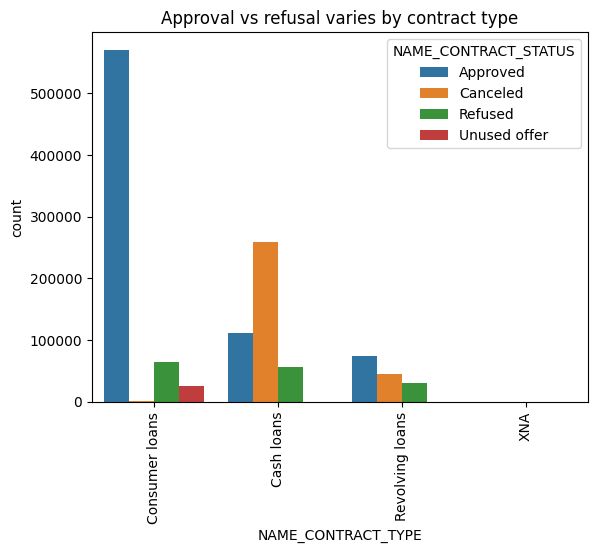

In [53]:
#Contract Type vs Status — bar chart (shows approval rate by product type)
sns.countplot(x="NAME_CONTRACT_TYPE", hue="NAME_CONTRACT_STATUS", data=df)
plt.title("Approval vs refusal varies by contract type")
plt.xticks(rotation=90)
plt.show()


In [54]:
#4.3 Multivariate Analysis

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


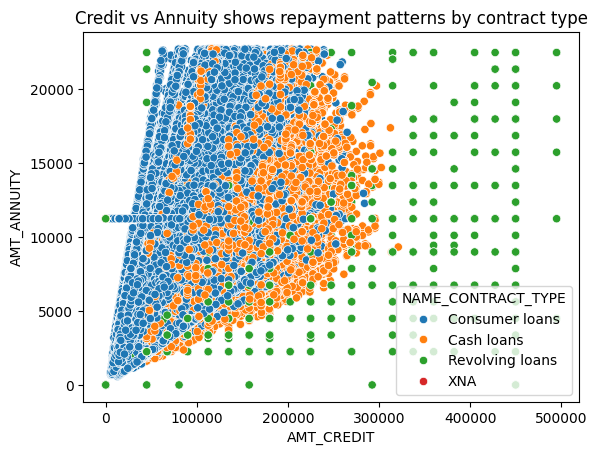

In [55]:
#AMT_CREDIT × AMT_ANNUITY × CONTRACT_TYPE — scatterplot
#Reveals how loan size and repayment burden vary by contract type.
sns.scatterplot(x=df["AMT_CREDIT"], y=df["AMT_ANNUITY"], hue=df["NAME_CONTRACT_TYPE"])
plt.title("Credit vs Annuity shows repayment patterns by contract type")
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


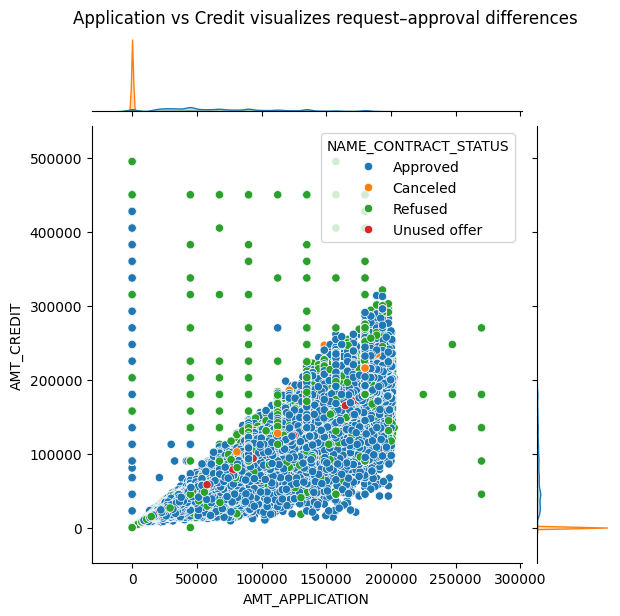

In [56]:
#AMT_APPLICATION × AMT_CREDIT × STATUS — jointplot
#Shows relationship between what customers request and what gets approved/refused.
sns.jointplot(x="AMT_APPLICATION", y="AMT_CREDIT", data=df, kind="scatter", hue="NAME_CONTRACT_STATUS")
plt.suptitle("Application vs Credit visualizes request–approval differences", y=1.02)
plt.show()


In [57]:
#Correlation Analysis

In [58]:
#Correlation matrix (numeric only)
#Shows how numeric features move together.
corr = df.select_dtypes(include='number').corr()
corr.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_DECISION_ABS,YEARS_DECISION,CREDIT_ANNUITY_RATIO,APPLICATION_CREDIT_RATIO,IS_REFUSED,IS_APPROVED
SK_ID_PREV,1.000000,-0.000426,0.014078,-0.022066,-0.017736,0.016835,-0.004260,-0.002452,0.020371,-0.001126,0.004867,-0.020371,-0.020371,-0.024412,-0.005139,0.020566,-0.047510
SK_ID_CURR,-0.000426,1.000000,0.000486,-0.000121,0.000001,0.000480,0.003266,-0.000100,-0.000470,0.001022,-0.000737,0.000470,0.000470,-0.000250,0.000533,0.000573,-0.000991
AMT_ANNUITY,0.014078,0.000486,1.000000,0.287219,0.393686,0.692774,-0.035683,0.023350,0.246137,-0.009564,0.055478,-0.246137,-0.246137,-0.267541,-0.147737,-0.008061,-0.220275
AMT_APPLICATION,-0.022066,-0.000121,0.287219,1.000000,0.680213,0.428954,0.061739,0.027965,-0.176279,0.027249,0.311470,0.176279,0.176279,0.537357,0.219035,0.082181,0.451278
AMT_CREDIT,-0.017736,0.000001,0.393686,0.680213,1.000000,0.410825,0.032350,-0.107991,-0.171521,0.017075,0.077340,0.171521,0.171521,0.706260,-0.511524,0.102269,0.401522


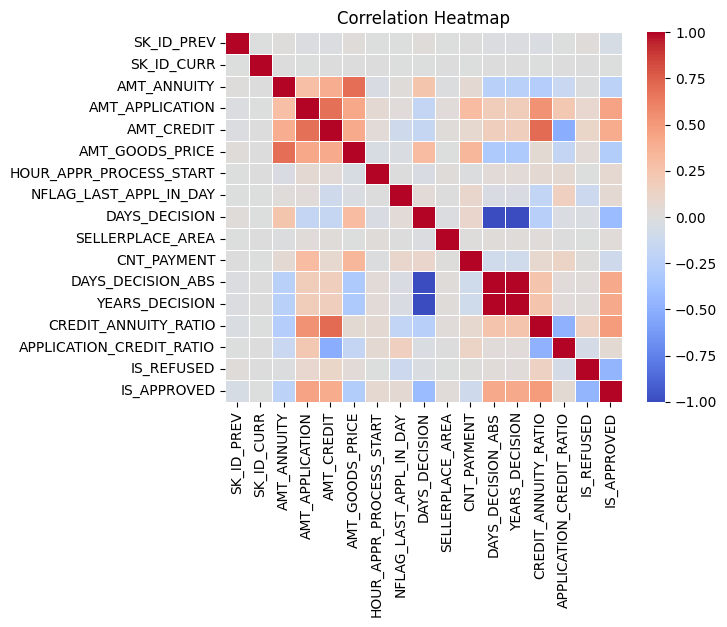

In [59]:
# Heatmap
#Visualizes strongest positive and negative relationships.
sns.heatmap(corr, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [60]:
#Top correlations with IS_REFUSED
#Identifies features most linked to refusals.
corr["IS_REFUSED"].sort_values(ascending=False).head(10)

,IS_REFUSED
IS_REFUSED,1.000000
CREDIT_ANNUITY_RATIO,0.144492
AMT_CREDIT,0.102269
AMT_APPLICATION,0.082181
AMT_GOODS_PRICE,0.032984
DAYS_DECISION_ABS,0.028991
YEARS_DECISION,0.028991
SK_ID_PREV,0.020566
CNT_PAYMENT,0.012977
SK_ID_CURR,0.000573


# **5 HYPOTHESIS TESTING**

In [61]:
#Test 1 — Credit Amount vs Status (Two-Sample t-test)
#Checks if refused applications request higher credit amounts.
#H0: Mean credit amount for approved and refused applications is the same.
#H1: Refused applications have a different (higher) mean credit amount than approved ones.

In [62]:
from scipy.stats import ttest_ind
approved = np.log1p(df[df["NAME_CONTRACT_STATUS"]=="Approved"]["AMT_CREDIT"])
refused  = np.log1p(df[df["NAME_CONTRACT_STATUS"]=="Refused"]["AMT_CREDIT"])
tstat,pval = ttest_ind(approved, refused, equal_var=False)
tstat,pval

(np.float64(169.27401213995793), np.float64(0.0))

In [63]:
#Test 2 — Contract Type vs Status (Chi-Square Test)
#Checks if refusal rate depends on contract/loan type.
#H0: Contract type and application status are independent.
#H1: Contract type and application status are dependent.

In [64]:
from scipy.stats import chi2_contingency
table = pd.crosstab(df["NAME_CONTRACT_TYPE"], df["NAME_CONTRACT_STATUS"])
chi2,pval,dof,expected  = chi2_contingency(table)
chi2,pval,dof

(np.float64(576563.394561063), np.float64(0.0), 9)

In [65]:
#6.3 Test 3 — Portfolio/Channel vs Status (Chi-Square Test)
#Checks if refusals differ by product/channel category.
#H0: NAME_GOODS_CATEGORY has no relationship with refusal.
#H1: NAME_GOODS_CATEGORY on product/channel category.
table = pd.crosstab(df["NAME_GOODS_CATEGORY"], df["NAME_CONTRACT_STATUS"])
chi2,pval,dof,expected = chi2_contingency(table); print(pval)
chi2,pval,dof

0.0


(np.float64(571081.6206509359), np.float64(0.0), 78)

In [66]:
#Test — Contract Type vs Credit Amount (ANOVA)
# Checks if mean credit amount varies by loan product type.
#H0: All contract types have the same mean credit amount.
#H1: At least one contract type has a different mean credit amount.
from scipy.stats import f_oneway
groups = [df[df["NAME_CONTRACT_TYPE"]==t]["AMT_CREDIT"] for t in df["NAME_CONTRACT_TYPE"].unique()]
stat,pval = f_oneway(*groups)
stat,pval

(np.float64(32566.817579914823), np.float64(0.0))

# **2 nd DATA SET LOADING AND WORKING**

# **1 DATA SET LOAD**

In [195]:
df1=pd.read_csv('/content/drive/MyDrive/credit_risk_applicants.csv')

In [68]:
# PRINT FIRST FIVE LINES OF DATA
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
# PRINT DATA SHPE COLUMNS AND ROWS
df1.shape

(307511, 122)

In [70]:
# PRINT THE DATA INFORMATION
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [71]:
# PRINT THE DATA INFORMATION
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# **2 DATA CLEANING**


In [72]:
#HANDLING THE MISSIING VALUE
#SUM THE VALUE OF NULL VALUES
df1.isna().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [73]:
#CALCULATE % MISSING FOR EACH COLUMN
missing_percentage=(df1.isna().sum()/len(df1))*100
missing_percentage.sort_values(ascending=False)

,0
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
COMMONAREA_MEDI,69.872297
NONLIVINGAPARTMENTS_MEDI,69.432963
NONLIVINGAPARTMENTS_MODE,69.432963
...,...
FLAG_DOCUMENT_16,0.000000
FLAG_DOCUMENT_15,0.000000
FLAG_DOCUMENT_14,0.000000
FLAG_DOCUMENT_20,0.000000


In [74]:
#DROP COLUMN WHERE MISSING PERCENTGAE IS GREATER THAN 40.
#BEACUSE THEY DONT ADD ANY INSIGHTS TO BUSINESS
colums_drop=missing_percentage[missing_percentage>40].index.tolist()
colums_drop

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [75]:
# DROP THE COLUM USES IGNORE FOR OCCURING ERRORS
df1=df1.drop(columns=colums_drop,errors='ignore')

In [76]:
# NOW IN DF  ROWS=307511 and Columns = 73
df1.shape

(307511, 73)

In [77]:
# NUMERICAL COLUMN ARE REPLACING USING THE MEDIAN
num_cols=df1.select_dtypes(include='number').columns

#NOW FINDIAN MEDIAN OF THIS COLUMNS  FOR REPLACING NULL VALUE
median_values= df1[num_cols].median()

#FILLNA USE FOR REPLACING THE MEDIAN VALUE
df1[num_cols]=df1[num_cols].fillna(median_values)

In [78]:
# NUMERICAL COLUMN ARE REPLACING USING THE mode
cat_cols=df1.select_dtypes(include='object').columns

#NOW FINDIAN mode OF THIS COLUMNS  FOR REPLACING NULL VALUE
mode= df1[cat_cols].mode().iloc[0]

#FILLNA USE FOR REPLACING THE mode VALUE
df1[cat_cols]=df1[cat_cols].fillna(mode)

In [79]:
# CHECKING THAT IS THE DATA NOW CLEAN OR NOT FOR WORKING
# THE PERCENTAGE OF DATA MISSING IS 0 now SO NOW WE CAN WORK
missing_percentage=(df1.isna().sum()/len(df1))*100
missing_percentage.sort_values(ascending=False)

,0
SK_ID_CURR,0.0
TARGET,0.0
NAME_CONTRACT_TYPE,0.0
CODE_GENDER,0.0
FLAG_OWN_CAR,0.0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.0
AMT_REQ_CREDIT_BUREAU_WEEK,0.0
AMT_REQ_CREDIT_BUREAU_MON,0.0
AMT_REQ_CREDIT_BUREAU_QRT,0.0


In [80]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
#INCORRECT VALUES SO FIXING THAT
df1['DAYS_BIRTH'].head()

,DAYS_BIRTH
0,-9461
1,-16765
2,-19046
3,-19005
4,-19932


In [221]:
#DAYS_BIRTH CONVERTING TO AGE YEARS
df1['Age_years']=-df1['DAYS_BIRTH']/365.25

In [83]:
#NEW COLUM MAKE AGE YEARS WHERE THE VALUE THINK SO CORRECT
df1.Age_years.head()

,Age_years
0,25.902806
1,45.900068
2,52.145106
3,52.032854
4,54.570842


In [84]:
#DAYS_EMPLOYED placeholder value → replace 365243 with NaN.
df1['DAYS_EMPLOYED'] = df1['DAYS_EMPLOYED'].replace(365243, np.nan)

In [224]:
#	Convert that into employment years.
df1['YEARS_EMPLOYED'] = -df1['DAYS_EMPLOYED'] / 365.25

In [86]:
#CONVERT THE DAYS INTO YEAR OF EMPLOYEE
df1['YEARS_EMPLOYED'].head()

,YEARS_EMPLOYED
0,1.744011
1,3.252567
2,0.616016
3,8.320329
4,8.317591


In [87]:
# Remove obvious outliers

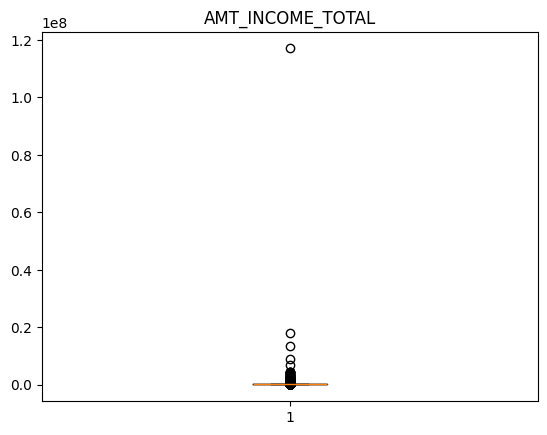

In [88]:
#CHECKING FOR INCOME COLUMN

plt.boxplot(df1.AMT_INCOME_TOTAL)
plt.title('AMT_INCOME_TOTAL')
plt.show()

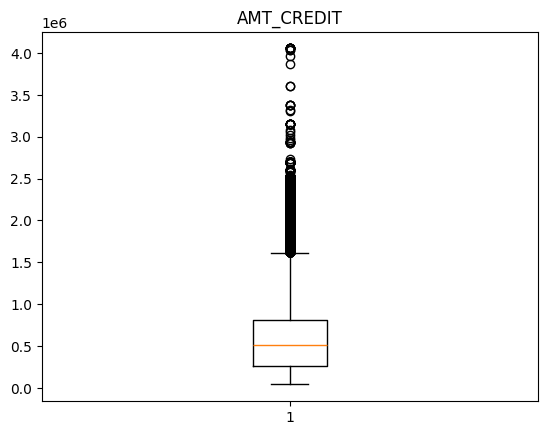

In [89]:
#CHECKING CREDIT AMOUNT
plt.boxplot(df1.AMT_CREDIT)
plt.title('AMT_CREDIT')
plt.show()

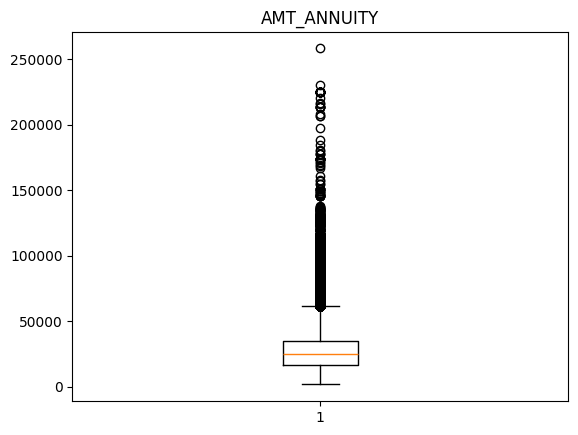

In [90]:
#CHECKING AMT_ANNUITY AMOUNT
plt.boxplot(df1.AMT_ANNUITY)
plt.title('AMT_ANNUITY')
plt.show()

In [197]:
#SAVING IN ONE COLUM FOR DELETING THE OUTLIERS
cols_outliers=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']

In [210]:

# USES FOR LOOP FOR DELTING OUTLIERS
for col in cols_outliers:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df1= df1[(df1[col] >= lower) & (df1[col] <= upper)]


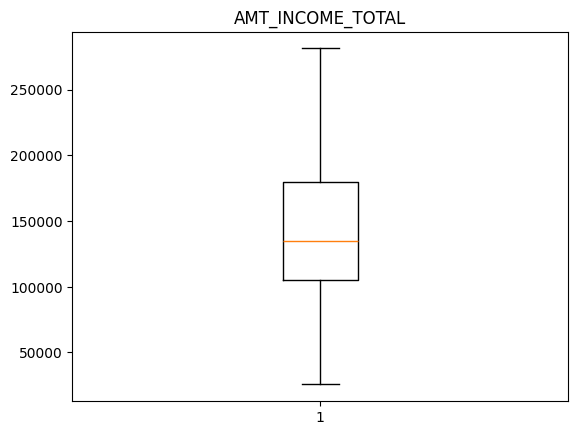

In [203]:
plt.boxplot(df1.AMT_INCOME_TOTAL)
plt.title('AMT_INCOME_TOTAL')
plt.show()

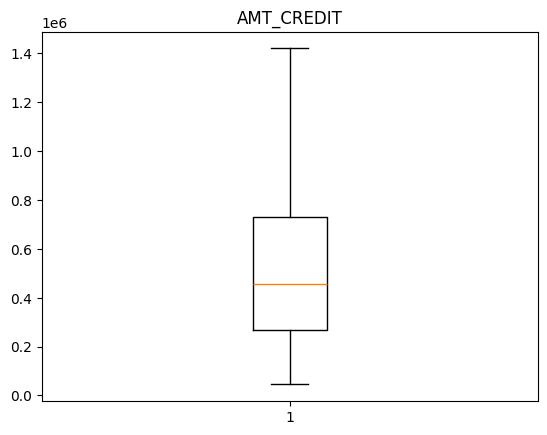

In [211]:
#CHECKING CREDIT AMOUNT
plt.boxplot(df1.AMT_CREDIT)
plt.title('AMT_CREDIT')
plt.show()

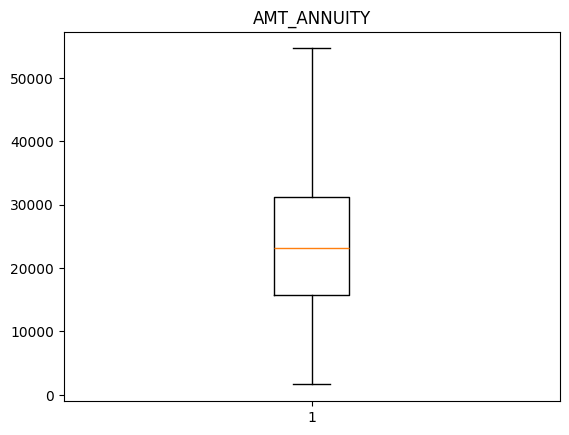

In [209]:
#CHECKING AMT_ANNUITY AMOUNT
plt.boxplot(df1.AMT_ANNUITY)
plt.title('AMT_ANNUITY')

plt.show()

# **3 FEATURE ENGINEERING**


In [96]:
# DATA IS CLEAN SO NOW WE CAN START FEATURE ENGINERRING TO START ANALYZING THE DATA .
# I ALREADY CREATE AGE YEARS & YEARS EMPLOYEED

In [97]:
# Ratio of Credit-to-Income
#WE DIVIDED AMT_CREDIT AND AMT_INCOME_TOTAL
# REPLACE USES IF THE INCOME IS ZERO FOR THAT
df1['CREDIT_INCOME_RATIO'] = df1['AMT_CREDIT'] / df1['AMT_INCOME_TOTAL'].replace(0, np.nan)

In [98]:
#NEW COLUM OF CREDIT RATIO IS ADDED
df1['CREDIT_INCOME_RATIO'].head()

,CREDIT_INCOME_RATIO
0,2.007889
1,4.790750
2,2.000000
3,2.316167
4,4.222222


In [99]:
#Flag variables such as:
#has_prev_refusal
#has_prev_approval
df1['has_prev_refusal'] = (df1['NAME_CONTRACT_TYPE'] == 'Refused').astype(int)
df1['has_prev_approval'] = (df1['NAME_CONTRACT_TYPE'] == 'Approved').astype(int)


#has_prev_refusal = 1 if ANY previous rejection
#has_prev_approval = 1 if ANY previous approval
#Missing customers get 0

# **4 . EDA**

In [100]:
#4.1 Univariate Analysis
# It means anlyzing one varibale at a time .

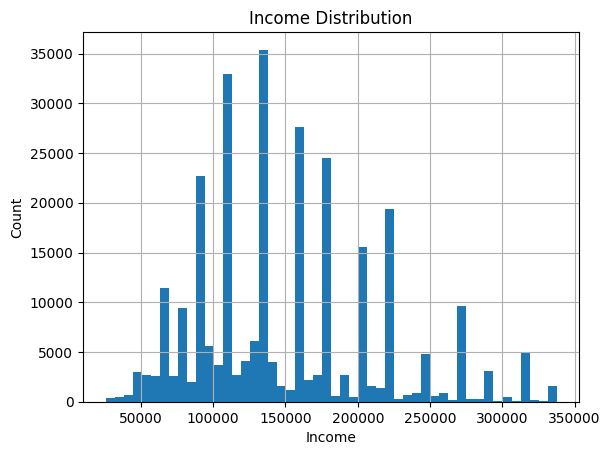

In [101]:
#A.FOR Numerical Variables .
# INCOME HAVING NUMERICAL VALUE
df1['AMT_INCOME_TOTAL'].hist(bins=50)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

# ITS CHECK THE SKEWNESS AND PEAKS

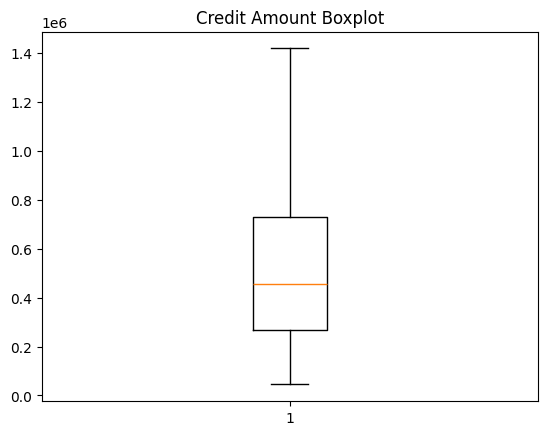

In [212]:
# FOR CREDIT AMOUNT WHERE NUMERICAL VALUE IS THERE
plt.boxplot(df1['AMT_CREDIT'])
plt.title("Credit Amount Boxplot")
plt.show()

#ITS DETECT THE EXTREME VALUES SO USE THAT

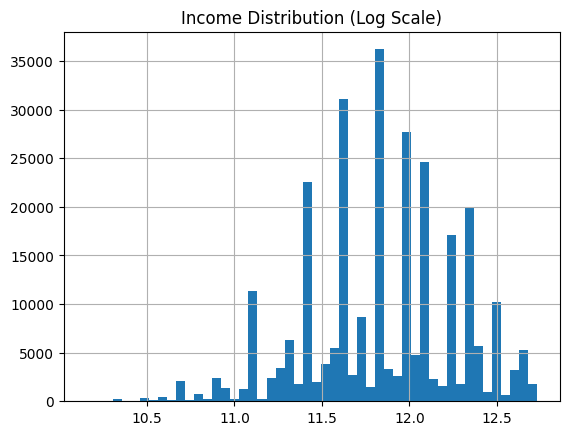

In [103]:
#3. Distribution with Log Scale (for highly skewed data)

df1['AMT_INCOME_TOTAL'].apply(np.log1p).hist(bins=50)
plt.title("Income Distribution (Log Scale)")
plt.show()

#ITS BASCIALLY SHOWING LEFT SKEW , RIGHT PEEK , LEFT TAIL , NEGTAIVE RELATIONSHIP

In [104]:
# B.Categorical Variables

In [105]:
#Categorical variables:
#Education type
#Gender

In [106]:
#COUNTPLOTS - TO SEE HOW MANY OBSERVATION FALL IN EACH CATGORY

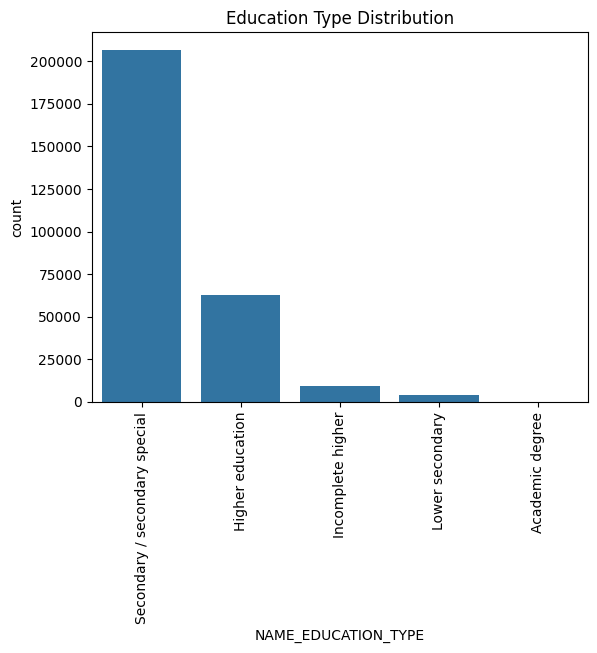

In [107]:
#Education type
sns.countplot(x='NAME_EDUCATION_TYPE', data=df1)
plt.xticks(rotation=90)
plt.title("Education Type Distribution")
plt.show()

#EDUCATION type counts for each type

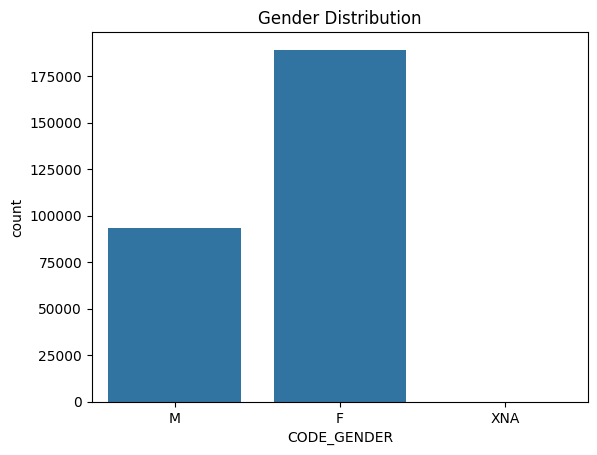

In [108]:
#Gender
sns.countplot(x='CODE_GENDER', data=df1)
plt.title("Gender Distribution")
plt.show()

#gender distribution where m having some count , female having some count which we plot in graph.

In [109]:
# 4.2 Bivariate Analysis

In [110]:
#1.Income groups → boxplot
#Shows difference in median income
#Highlights income spread for both groups
#Shows if defaulters have lower income

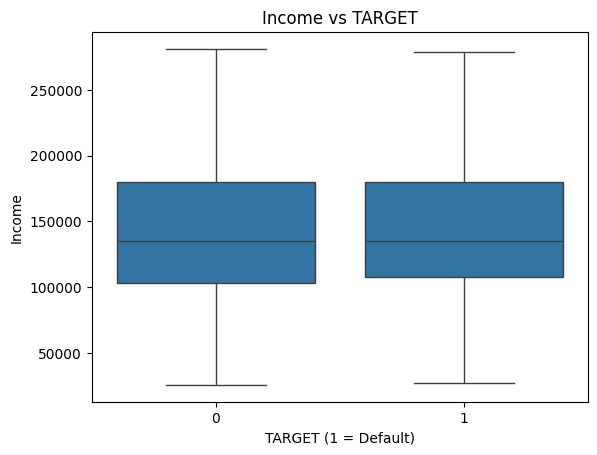

In [217]:
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df1)
plt.title("Income vs TARGET")
plt.xlabel("TARGET (1 = Default)")
plt.ylabel("Income")
plt.show()


In [112]:
#2. Credit Amount → Boxplot (TARGET vs AMT_CREDIT)
#See if defaulters take higher or lower loan amounts
#Identify risk patterns

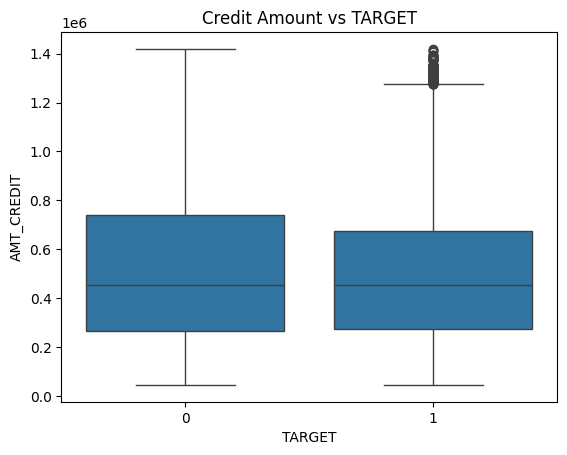

In [218]:
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=df1)
plt.title("Credit Amount vs TARGET")
plt.show()


In [114]:
#3. Education Type → Bar Chart (TARGET % by Education)
#Shows which education levels default more.

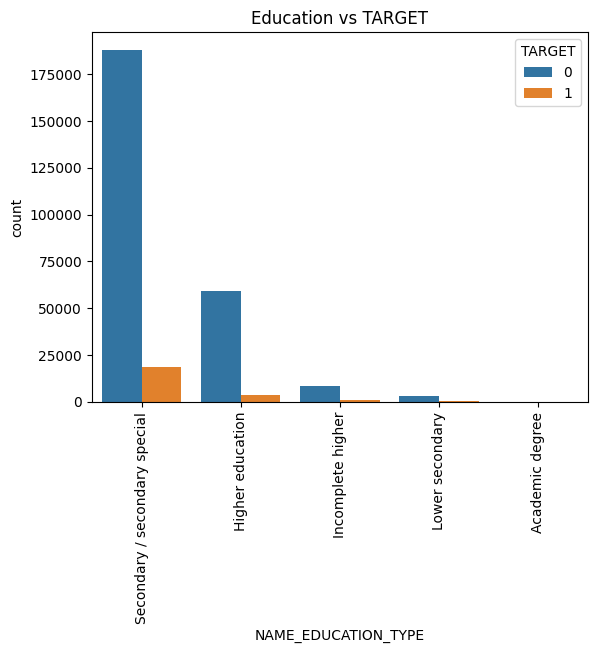

In [115]:
sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=df1)
plt.xticks(rotation=90)
plt.title("Education vs TARGET")
plt.show()


In [116]:
#4. Employment Length → Compare Histograms or Boxplots
#Shorter employment years → higher default risk
#Long-term employed customers → more stable → low default rate

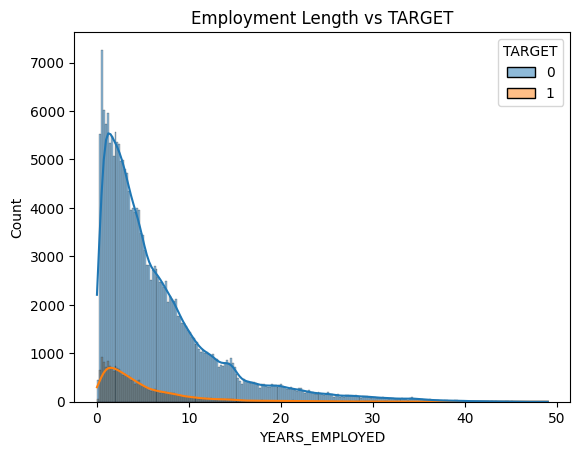

In [117]:
sns.histplot(data=df1, x='YEARS_EMPLOYED', hue='TARGET', kde=True)
plt.title("Employment Length vs TARGET")
plt.show()


In [118]:
# 5. External Scores → Compare Averages
#External sources measure creditworthiness:
#Non-defaulters usually have higher external scores
#Defaulters have lower values → predictive features

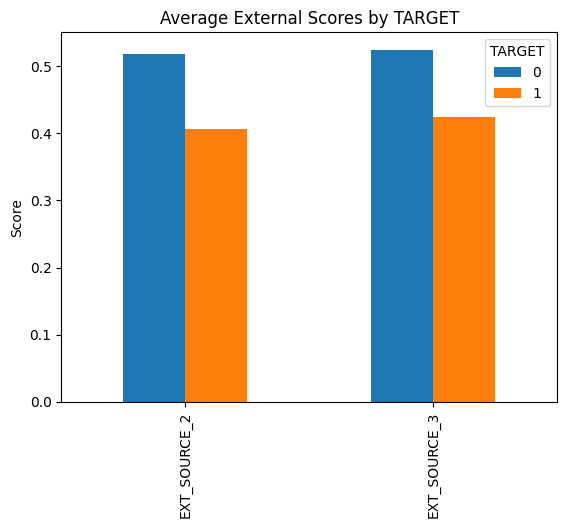

In [119]:
ext_cols = ['EXT_SOURCE_2', 'EXT_SOURCE_3']
df1.groupby('TARGET')[ext_cols].mean().T.plot(kind='bar')
plt.title("Average External Scores by TARGET")
plt.ylabel("Score")
plt.show()


In [120]:
#4.3 Multivariate Analysis

In [121]:
#A. Income × Credit × TARGET
#We want to see whether income and credit amount together affect default rates.
#Use a scatterplot with color = TARGET

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

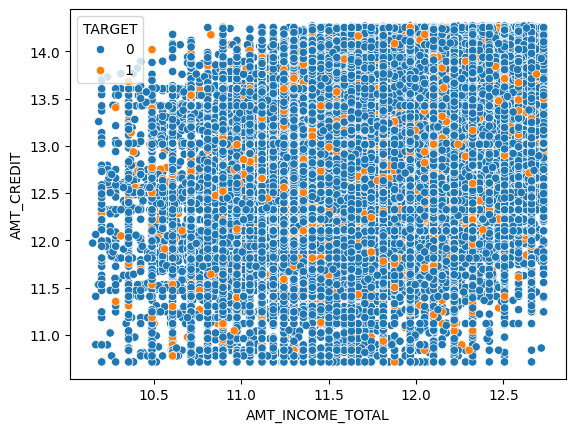

In [122]:
sns.scatterplot(
    data=df1,
    x=np.log1p(df1['AMT_INCOME_TOTAL']),
    y=np.log1p(df1['AMT_CREDIT']),
    hue='TARGET'
)


In [123]:
#B. Age × Employment × TARGET
#This shows combined effect of:
#Age
#Employment stability
#Default behavior

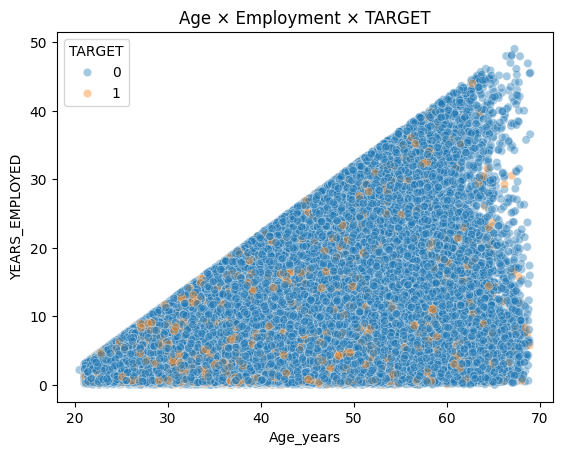

In [124]:
sns.scatterplot(
    data=df1,
    x='Age_years',
    y='YEARS_EMPLOYED',
    hue='TARGET',
    alpha=0.4
)
plt.title("Age × Employment × TARGET")
plt.show()


In [125]:
#C.External Scores × TARGET (grouped boxplot)
#Defaulters will have much lower external scores
#one of the strongest predictors.

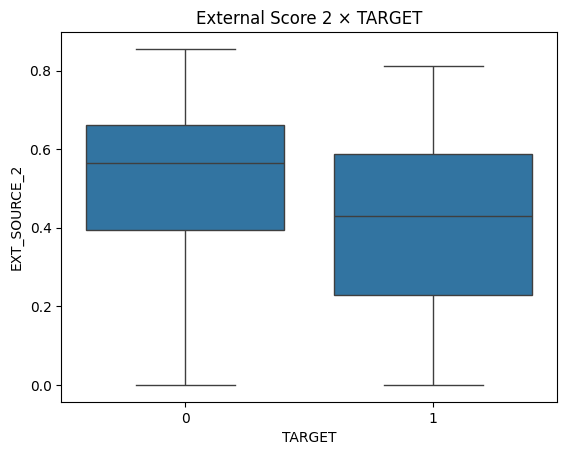

In [219]:
sns.boxplot(x='TARGET', y='EXT_SOURCE_2', data=df1)
plt.title("External Score 2 × TARGET")
plt.show()


In [129]:
#4.4 Correlation Analysis
#Correlation analysis helps you find:
#How strongly numerical variables are related
#Which features are most predictive of TARGET
#Whether multicollinearity exists (high correlation between features)

In [130]:
#A. Compute Correlation Matrix
#We only use numerical columns.
#Red = highly positive correlation
#Blue = negative correlation
#Light colors = weak correlation

num_cols = df1.select_dtypes(include=['int64','float64']).columns
corr_matrix = df1[num_cols].corr()

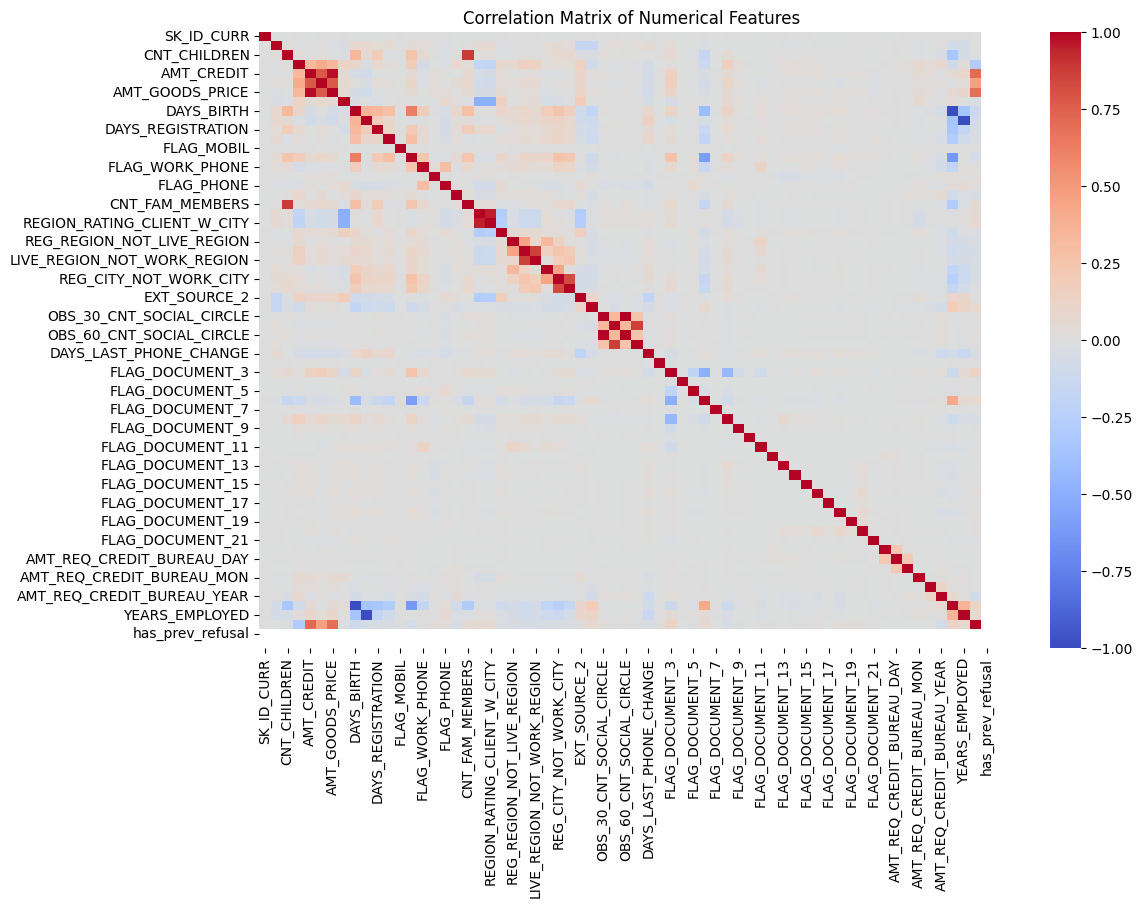

In [131]:
#Heatmap is best for corelation analysis

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [132]:
# B. Find Top Predictors of TARGET
#We sort correlations with TARGET in descending order.
target_corr = corr_matrix['TARGET'].sort_values(ascending=False)
target_corr


,TARGET
TARGET,1.000000
DAYS_BIRTH,0.080314
DAYS_EMPLOYED,0.073951
REGION_RATING_CLIENT_W_CITY,0.057361
DAYS_LAST_PHONE_CHANGE,0.056866
...,...
Age_years,-0.080314
EXT_SOURCE_3,-0.157442
EXT_SOURCE_2,-0.159575
has_prev_refusal,NaN


In [133]:
# C. Plot Top 10 Predictors of TARGET
#Interpretation Rules:

#Negative correlation with TARGET
#lower value = safer customer
#typical example: EXT_SOURCE_2, EXT_SOURCE_3

#Positive correlation
# higher value increases default risk

#Absolute value matters
# |corr| > 0.1 = meaningful
# |corr| > 0.20 = strong

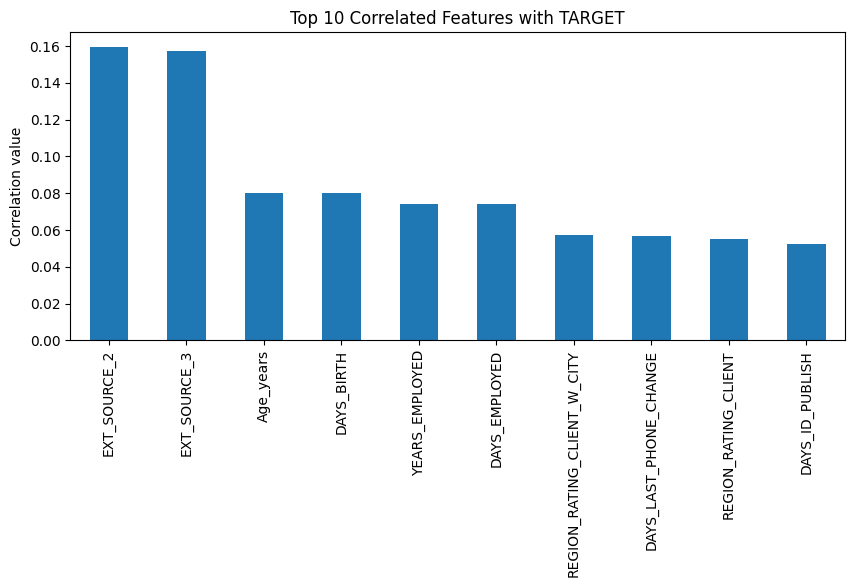

In [134]:
top_10 = target_corr.abs().sort_values(ascending=False)[1:11]

top_10.plot(kind='bar', figsize=(10,4))
plt.title("Top 10 Correlated Features with TARGET")
plt.ylabel("Correlation value")
plt.show()


# **5.HYPOTHESIS TESTING**

In [135]:
#Test 1 — Income Difference Between Defaulters & Non-defaulters

In [136]:
#Do defaulters have significantly lower income?
#Method: Two-sample independent t-test
#Null Hypothesis (H0):
#Mean income of defaulters = mean income of non-defaulters
#Alternative (H1):
#Mean income of defaulters < mean income of non-defaulters
#p-value < 0.05 → defaulters have significantly lower income
#p-value ≥ 0.05 → no meaningful income difference

In [137]:
import numpy as np
from scipy.stats import ttest_ind
df1['LOG_INCOME'] = np.log1p(df1['AMT_INCOME_TOTAL'])

group0 = df1[df1['TARGET'] == 0]['LOG_INCOME']
group1 = df1[df1['TARGET'] == 1]['LOG_INCOME']

ttest_ind(group0, group1, equal_var=False)

TtestResult(statistic=np.float64(3.6165936470289215), pvalue=np.float64(0.000299025694195361), df=np.float64(28216.573347498612))

In [138]:
#Test 2 — Gender vs Default (Categorical vs Categorical)
#Is the default rate the same for males and females?
#Method: Chi-Square Test of Independence
#Null Hypothesis (H0):
#Gender and default are independent (no relationship)
#Alternative (H1):
#Gender and default are NOT independent
#p-value < 0.05 → gender affects default rate
#p-value ≥ 0.05 → no effect

In [139]:
from scipy.stats import chi2_contingency
import scipy.stats as stats

contingency = pd.crosstab(df1['CODE_GENDER'], df1['TARGET'])
stats.chi2_contingency(contingency)


Chi2ContingencyResult(statistic=np.float64(975.2883721503619), pvalue=np.float64(1.6550871061466215e-212), dof=2, expected_freq=array([[1.73462889e+05, 1.57011111e+04],
       [8.58034431e+04, 7.76655688e+03],
       [3.66798945e+00, 3.32010554e-01]]))

In [140]:
#Test 3 — Education Level & Default
#ANOVA
#Does default depend on education level?
#p < 0.05 → education impacts default risk

In [141]:
df1['EDU_CODE'] = df1['NAME_EDUCATION_TYPE'].astype('category').cat.codes
stats.f_oneway(df1[df1.TARGET==0]['EDU_CODE'], df1[df1.TARGET==1]['EDU_CODE'])

F_onewayResult(statistic=np.float64(713.2133177045031), pvalue=np.float64(6.280209268494243e-157))

# **MERGING TWO DATASETS**

In [231]:
#MERGE THE DATSETS

df_merged = pd.merge(df, df1, on="SK_ID_CURR", how="left")

#his keeps all customer records
#Adds previous-loan information where available

In [ ]:
#Chi-Square Test: Previous Rejections vs Current Default
#Checks whether customers who were refused before are more likely to default now.
#H0 (Null): Previous loan refusals do not affect current default probability.
#H1 (Alt): Customers with previous refusals have a higher default probability.

#p < 0.05 → Reject H0 → Previous rejections predict higher default risk
#p ≥ 0.05 → Fail H0 → No relationship

In [232]:
from scipy.stats import chi2_contingency

# Create flags
df_merged["PREV_REJ"] = (df_merged["NAME_CONTRACT_STATUS"] == "Refused").astype(int)
df_merged["DEFAULT"] = df_merged["TARGET"]

# Contingency table
table = pd.crosstab(df_merged["PREV_REJ"], df_merged["DEFAULT"])

# Chi-square test
chi2, p, dof, ex = chi2_contingency(table)
print("p-value:", p)


p-value: 0.0


In [ ]:
#One-Sample Z-Test: Company Default Rate vs Industry Benchmark
#Tests whether the company’s default rate is worse than the industry average.

#H0 (Null): Company default rate = industry default rate
#H1 (Alt): Company default rate ≠ industry default rate

#p < 0.05 → Reject H0 → Company default rate is significantly different (likely higher)

#p ≥ 0.05 → Fail H0 → No evidence company is worse

In [233]:
from statsmodels.stats.proportion import proportions_ztest

company_rate = df_merged["TARGET"].mean()
industry_rate = 0.10

count = int(company_rate * 1000)  # convert to counts
nobs  = 1000

stat, p = proportions_ztest(count, nobs, value=industry_rate)
print("p-value:", p)


p-value: 0.08896730690742094
